# Data Understanding

In [120]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
from skimpy import skim 
from summarytools import dfSummary 

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder  
from imblearn.over_sampling import SMOTE  


from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.metrics import roc_curve, auc  


%matplotlib inline

In [121]:
df = pd.read_csv('dataset sensus.csv')  

In [122]:
df.info

<bound method DataFrame.info of           No  Usia Jenis_Kelamin Kegiatan Bekerja Menikah Olahraga  \
0          1   Tua          Pria    Pasif   Tidak      Ya   Sering   
1          2   Tua          Pria    Aktif   Tidak      Ya   Jarang   
2          3  Muda          Pria    Aktif   Tidak      Ya   Jarang   
3          4   Tua          Pria    Aktif      Ya   Tidak   Jarang   
4          5  Muda        Wanita    Pasif      Ya   Tidak   Sering   
...      ...   ...           ...      ...     ...     ...      ...   
29995  29996  Muda          Pria    Aktif   Tidak      Ya   Jarang   
29996  29997   Tua        Wanita    Aktif      Ya      Ya   Jarang   
29997  29998   Tua        Wanita    Aktif      Ya      Ya   Jarang   
29998  29999  Muda        Wanita    Pasif      Ya   Tidak   Sering   
29999  30000   Tua        Wanita    Pasif   Tidak   Tidak   Sering   

      Penyakit_Bawaan Kendaraan  
0               Tidak       Ada  
1                 Ada       Ada  
2               Tidak    

In [123]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,No[int64],Mean (sd) : 15000.5 (8660.4)min < med < max:1.0 < 15000.5 < 30000.0IQR (CV) : 14999.5 (1.7),"30,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Usia[object],1. Muda2. Tua,"15,383 (51.3%)14,617 (48.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBN5BvwxOi96zgYy6GBL/QWjNAIZjZ3cxuvQ8Z1Ku19uh9xCjiPM9fKaWp9yEjqrXuIYRvgntPTClN67o+cs7P3seM5DiOz1LKtG3bzcyI7Q3RzCzn/FyW5af3MQO69z5gJB+9D8D/QWyQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig0w0+/sQsPcho+GZ+cVa615KmYwPAd1qrbuZvXrfMQoGL9cweHEITPmgwpvNj7fZSUz5nJjvnceUz4H53jVM+fz41X4Sf+pChtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhmmfA48p2uY8jkx3zuPwYsfg5eTfgEKW2rfqvpg/AAAAABJRU5ErkJggg=="">",0(0.0%)
3,Jenis_Kelamin[object],1. Wanita2. Pria,"22,225 (74.1%)7,775 (25.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABP0lEQVR4nO3bQWrDMBRF0a9iQjORMAYvxovoYrsI7cYYa9CETNRBx2lNHJ6+03tW8CE3gRi/UGs1QCGY2dnMTq0PwVPcaq2X1kfc0w3D8BFj7Fsfgv1KKUsI4dNrcF2MsZ+m6ZJSurY+Bo9b1/U959zP83wyM5+xmZmllK7jOH61Pga7nVsf8Ju31gfg/yA2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGmM/t58a71IdjnCJ9hV0pZcs69OX/xDn8rpSxmdmt9xz0MXl6L68FLYMoHlSP8srn+tmI791M+7/M0bOd6yneEeRq2O8KUj3/JL4KHupAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBxvWUz+tdeIz7KZ/3eRq2Y/ACmW8KW2rfQT8xYQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Kegiatan[object],1. Aktif2. Pasif,"15,210 (50.7%)14,790 (49.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBN5BvwxOi96zgYy6GBL/QWjNAIZjZ3cxuvQ8Z1Ku19uh9xCjiPM9fKaWp9yEjqrXuIYRvgntPTClN67o+cs7P3seM5DiOz1LKtG3bzcyI7Q3RzCzn/FyW5af3MQO69z5gJB+9D8D/QWyQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig0w0+/sQsPcho+GZ+cVa615KmYwPAd1qrbuZvXrfMQoGL9cweHEITPmgwpvNj7fZSUz5nJjvnceUz4H53jVM+fz41X4Sf+pChtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhmmfA48p2uY8jkx3zuPwYsfg5eTfgEKW2rfqvpg/AAAAABJRU5ErkJggg=="">",0(0.0%)
5,Bekerja[object],1. Ya2. Tidak,"18,964 (63.2%)11,036 (36.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOElEQVR4nO3bwYnDMBRF0a/BhMlGwhhcjIuYYqcIdWOMtUhCNsoiNfjJ1r+ngp9wMST4hVqrAQrBzO5mdmt9COxda322PuJIwzRNfzHGsfUh3pVSthDCf8/BDTHGcVmWZ0rp1foYr/Z9/805j+u63sys39jMzFJKr3meH62Pce7e+oCj/bQ+AH4QG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggM5h9X95rfYhnXr7/oZSy5ZxHc/Dy3pmVUjYze7e+40gMXs6j+8FLYMoHFS9Ptu6fGlfgYsrnYSZ3Bd1P+bzM5K7Ay5SPX9onwJ+6kCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGm+ylfz5/talxM+TzM5K6AwQtkPgpbat+zkoHLAAAAAElFTkSuQmCC"">",0(0.0%)
6,Menikah[object],1. Ya2. 

In [125]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No               30000 non-null  int64 
 1   Usia             30000 non-null  object
 2   Jenis_Kelamin    30000 non-null  object
 3   Kegiatan         30000 non-null  object
 4   Bekerja          30000 non-null  object
 5   Menikah          30000 non-null  object
 6   Olahraga         30000 non-null  object
 7   Penyakit_Bawaan  30000 non-null  object
 8   Kendaraan        30000 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB
None


In [127]:
print(df.describe())

                 No
count  30000.000000
mean   15000.500000
std     8660.398374
min        1.000000
25%     7500.750000
50%    15000.500000
75%    22500.250000
max    30000.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No               30000 non-null  int64 
 1   Usia             30000 non-null  object
 2   Jenis_Kelamin    30000 non-null  object
 3   Kegiatan         30000 non-null  object
 4   Bekerja          30000 non-null  object
 5   Menikah          30000 non-null  object
 6   Olahraga         30000 non-null  object
 7   Penyakit_Bawaan  30000 non-null  object
 8   Kendaraan        30000 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [124]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 30000  │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 9      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column     ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0   ┃ p25    ┃ p50      ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ No         │    0 │       0 │    15000 │    8660 │    1 │   7501 │    15000 │   22500 │   30000 │  ▇▇▇▇▇▇  │  │
│ └────────────┴──────┴─────────┴──────────┴─────────┴──────┴────────┴──────────┴─────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃              ┃    ┃      ┃          ┃         ┃        ┃        ┃ chars per   ┃ words per    ┃             ┃  │
│ ┃ column       ┃ NA ┃ NA % ┃ shortest ┃ longest ┃ min    ┃ max    ┃ row         ┃ row          ┃ total words ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Usia         │  0 │    0 │ Tua      │ Muda    │ Muda   │ Tua    │        3.51 │            1 │       30000 │  │
│ │ Jenis_Kelami │  0 │    0 │ Pria     │ Wanita  │ Pria   │ Wanita │        5.48 │            1 │       30000 │  │
│ │ n            │    │      │          │         │        │        │             │              │             │  │
│ │ Kegiatan     │  0 │    0 │ Pasif    │ Pasif   │ Aktif  │ Pasif  │           5 │            1 │       30000 │  │
│ │ Bekerja      │  0 │    0 │ Ya       │ Tidak   │ Tidak  │ Ya     │         3.1 │            1 │       30000 │  │
│ │ Menikah      │  0 │    0 │ Ya       │ Tidak   │ Tidak  │ Ya     │        3.25 │            1 │       30000 │  │
│ │ Olahraga     │  0 │    0 │ Sering   │ Sering  │ Jarang │ Sering │           6 │            1 │       30000 │  │
│ │ Penyakit_Baw │  0 │    0 │ Ada      │ Tidak   │ Ada    │ Tidak  │        3.71 │            1 │       30000 │  │
│ │ aan          │    │      │          │         │        │        │             │              │             │  │
│ │ Kendaraan    │  0 │    0 │ Ada      │ Tidak   │ Ada    │ Tidak  │        3.58 │            1 │       30000 │  │
│ └──────────────┴────┴──────┴──────────┴─────────┴────────┴────────┴─────────────┴──────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [110]:
print("Dimensi data:", df.shape)

Dimensi data: (30000, 9)


In [111]:
print("Baris pertama data:")
df.head()

Baris pertama data:


,No,Usia,Jenis_Kelamin,Kegiatan,Bekerja,Menikah,Olahraga,Penyakit_Bawaan,Kendaraan
0,1,Tua,Pria,Pasif,Tidak,Ya,Sering,Tidak,Ada
1,2,Tua,Pria,Aktif,Tidak,Ya,Jarang,Ada,Ada
2,3,Muda,Pria,Aktif,Tidak,Ya,Jarang,Tidak,Ada
3,4,Tua,Pria,Aktif,Ya,Tidak,Jarang,Ada,Ada
4,5,Muda,Wanita,Pasif,Ya,Tidak,Sering,Ada,Tidak


In [112]:
print("Baris terakhir data:")
df.tail()

Baris terakhir data:


,No,Usia,Jenis_Kelamin,Kegiatan,Bekerja,Menikah,Olahraga,Penyakit_Bawaan,Kendaraan
29995,29996,Muda,Pria,Aktif,Tidak,Ya,Jarang,Tidak,Ada
29996,29997,Tua,Wanita,Aktif,Ya,Ya,Jarang,Ada,Ada
29997,29998,Tua,Wanita,Aktif,Ya,Ya,Jarang,Ada,Ada
29998,29999,Muda,Wanita,Pasif,Ya,Tidak,Sering,Ada,Tidak
29999,30000,Tua,Wanita,Pasif,Tidak,Tidak,Sering,Tidak,Tidak


In [113]:
print("Tipe data setiap kolom:")
df.dtypes

Tipe data setiap kolom:


No                  int64
Usia               object
Jenis_Kelamin      object
Kegiatan           object
Bekerja            object
Menikah            object
Olahraga           object
Penyakit_Bawaan    object
Kendaraan          object
dtype: object

In [114]:
print("Statistik deskriptif untuk kolom numerik:")
df.describe()

Statistik deskriptif untuk kolom numerik:


,No
count,30000.000000
mean,15000.500000
std,8660.398374
min,1.000000
25%,7500.750000
50%,15000.500000
75%,22500.250000
max,30000.000000


# Data Preparation

In [115]:
print("Nilai yang hilang di setiap kolom:")
df.isnull().sum()

Nilai yang hilang di setiap kolom:


No                 0
Usia               0
Jenis_Kelamin      0
Kegiatan           0
Bekerja            0
Menikah            0
Olahraga           0
Penyakit_Bawaan    0
Kendaraan          0
dtype: int64

In [116]:
# # Langkah 1: Menangani Missing Values
# # Mengisi nilai yang hilang dengan mean untuk kolom numerik dan mode untuk kolom kategorikal
# for column in df.select_dtypes(include=[np.number]).columns:
#     df[column].fillna(df[column].mean(), inplace=True)

# for column in df.select_dtypes(include=[object]).columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

In [117]:
df

,No,Usia,Jenis_Kelamin,Kegiatan,Bekerja,Menikah,Olahraga,Penyakit_Bawaan,Kendaraan
0,1,Tua,Pria,Pasif,Tidak,Ya,Sering,Tidak,Ada
1,2,Tua,Pria,Aktif,Tidak,Ya,Jarang,Ada,Ada
2,3,Muda,Pria,Aktif,Tidak,Ya,Jarang,Tidak,Ada
3,4,Tua,Pria,Aktif,Ya,Tidak,Jarang,Ada,Ada
4,5,Muda,Wanita,Pasif,Ya,Tidak,Sering,Ada,Tidak
...,...,...,...,...,...,...,...,...,...
29995,29996,Muda,Pria,Aktif,Tidak,Ya,Jarang,Tidak,Ada
29996,29997,Tua,Wanita,Aktif,Ya,Ya,Jarang,Ada,Ada
29997,29998,Tua,Wanita,Aktif,Ya,Ya,Jarang,Ada,Ada
29998,29999,Muda,Wanita,Pasif,Ya,Tidak,Sering,Ada,Tidak


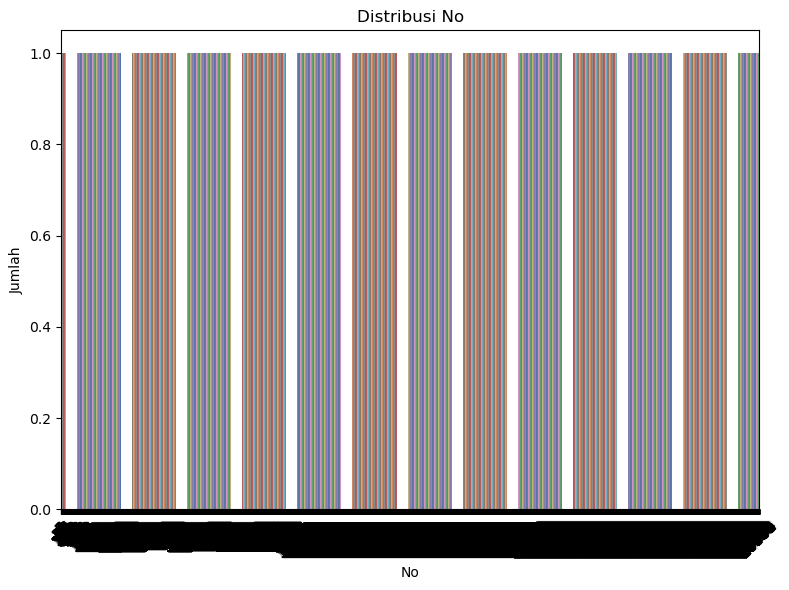

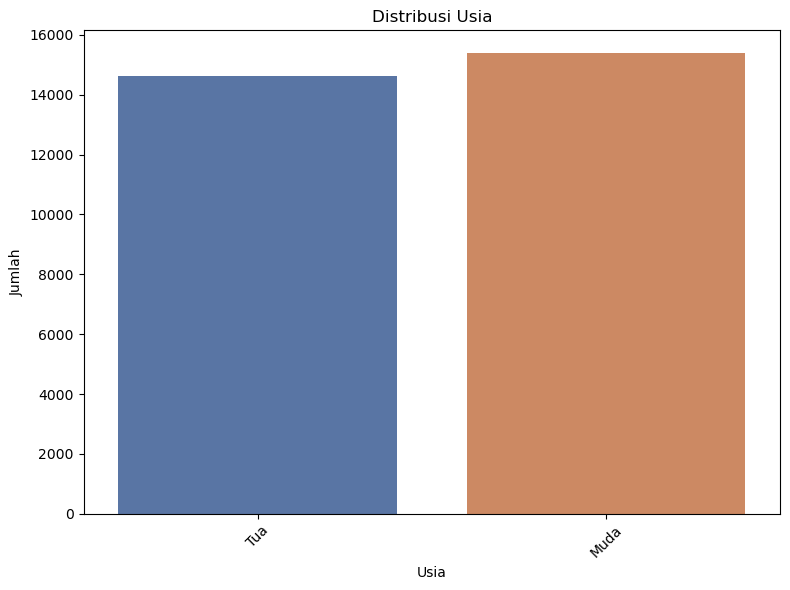

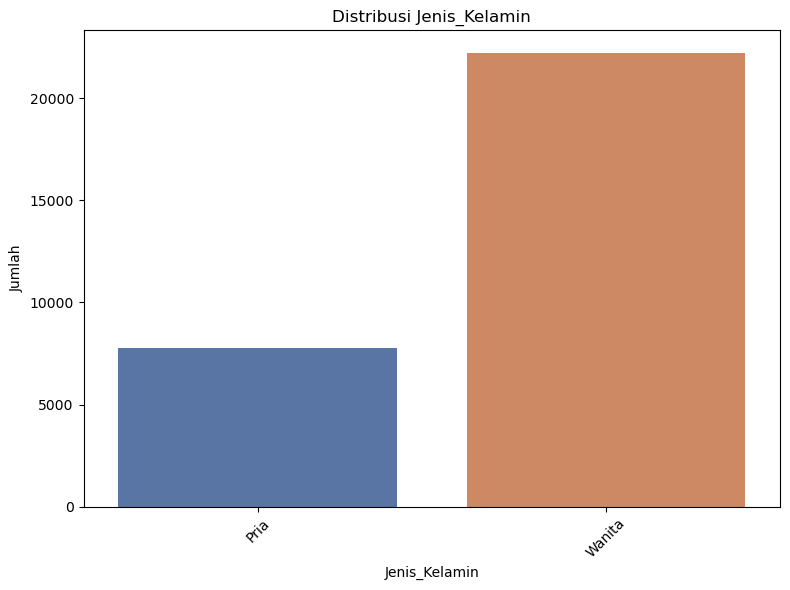

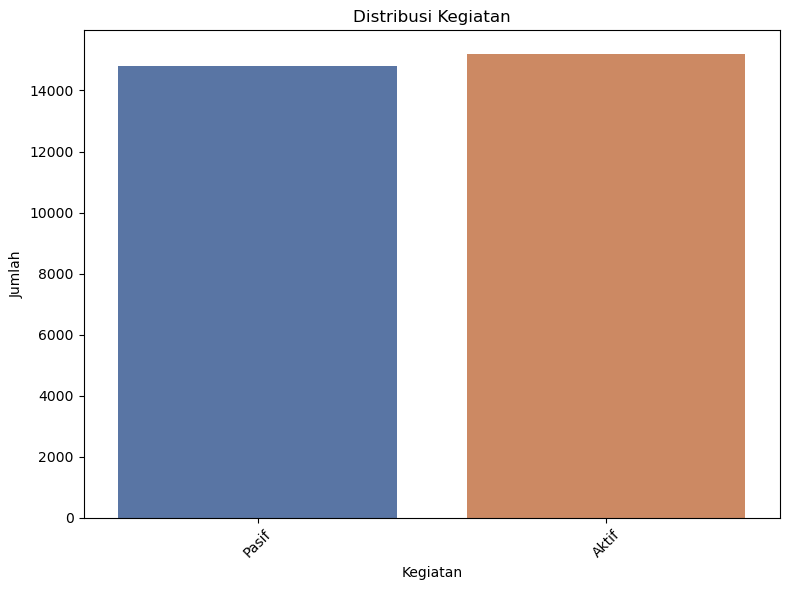

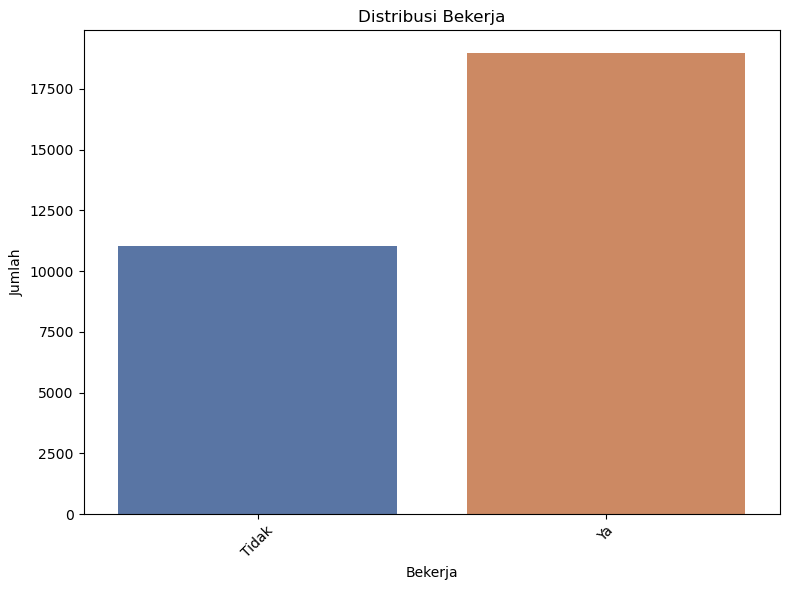

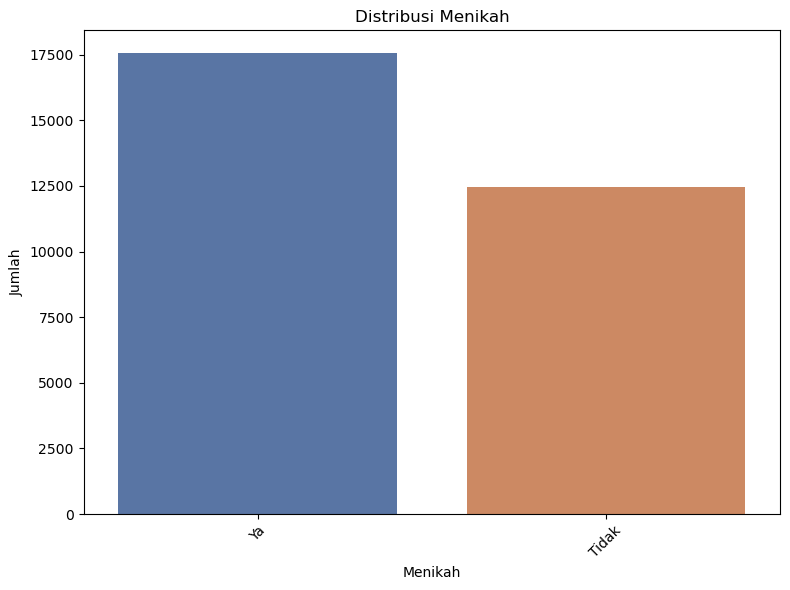

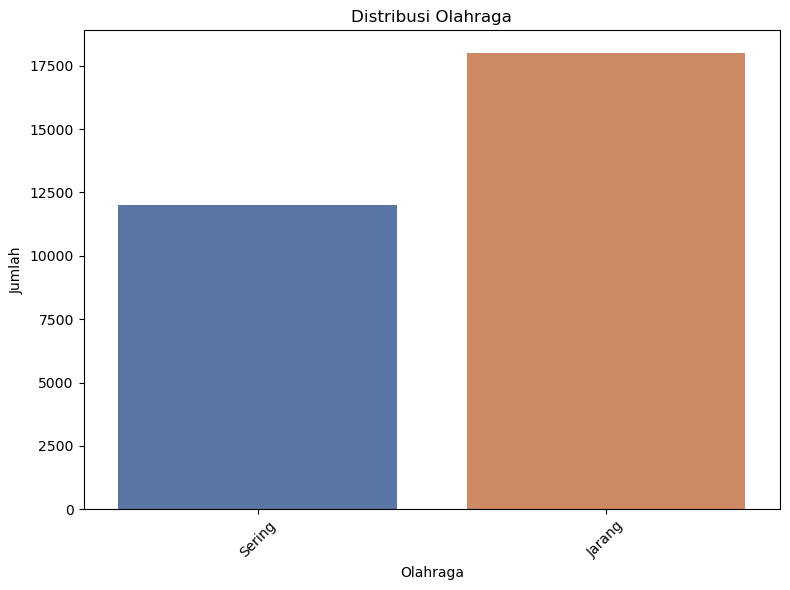

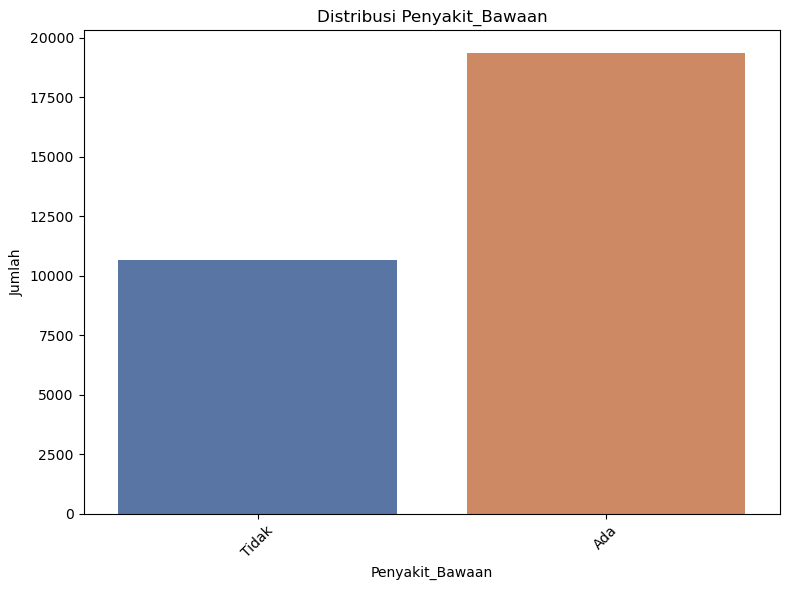

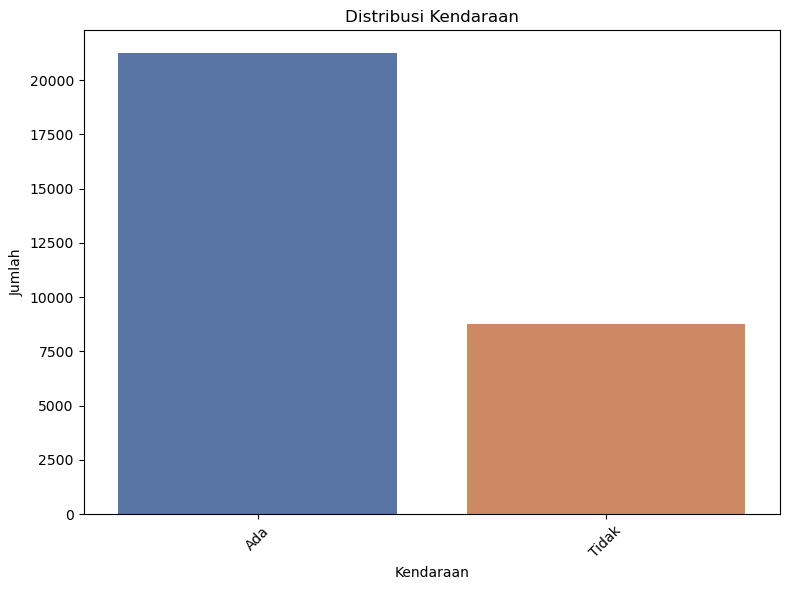

In [129]:
# Langkah 3: Data Visualization
# Membuat beberapa visualisasi dasar untuk memahami distribusi data

# Mendefinisikan fungsi plot_bar_chart yang menerima parameter data dan column
# Fungsi ini akan membuat visualisasi bar chart untuk setiap kolom
def plot_bar_chart(data, column):
    # Membuat figure baru dengan ukuran 8x6 inch
    plt.figure(figsize=(8, 6))
    
    # Membuat bar chart menggunakan seaborn countplot
    # x = nama kolom yang akan divisualisasikan
    # data = dataframe yang digunakan
    # hue = memberikan warna berbeda untuk setiap nilai unik pada kolom
    # palette = skema warna yang digunakan ("deep")
    # legend = False untuk menyembunyikan legend
    sns.countplot(x=column, data=data, hue=column, palette="deep", legend=False)
    
    # Menambahkan judul grafik
    plt.title(f'Distribusi {column}')
    
    # Menambahkan label pada sumbu x dan y
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    
    # Memutar label sumbu x 45 derajat agar lebih mudah dibaca
    plt.xticks(rotation=45)
    
    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Menampilkan plot
    plt.show()

# Melakukan iterasi untuk setiap kolom dalam dataframe
# Dan membuat bar chart untuk masing-masing kolom menggunakan fungsi plot_bar_chart
for column in df.columns:
    plot_bar_chart(df, column)


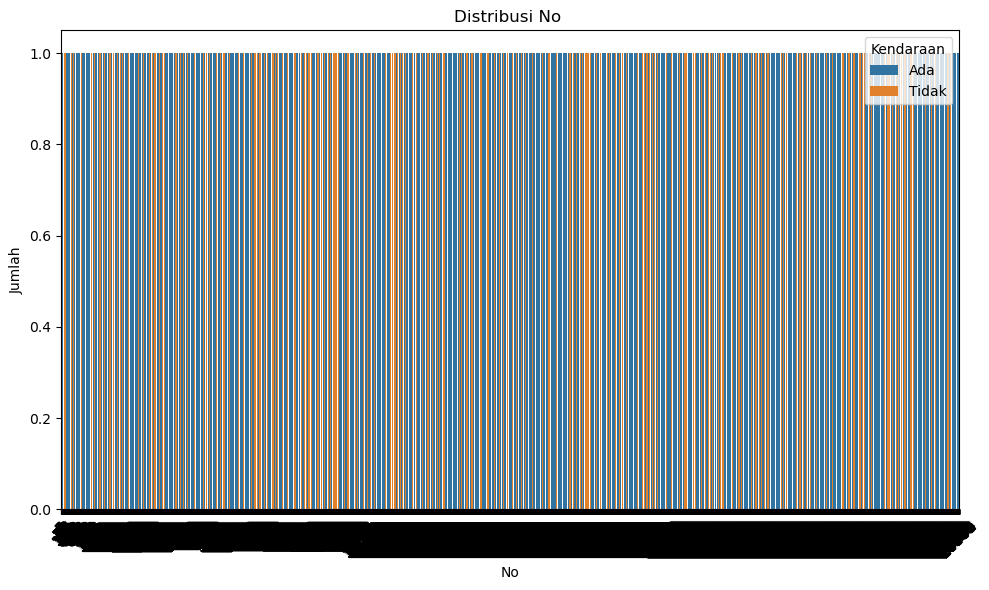

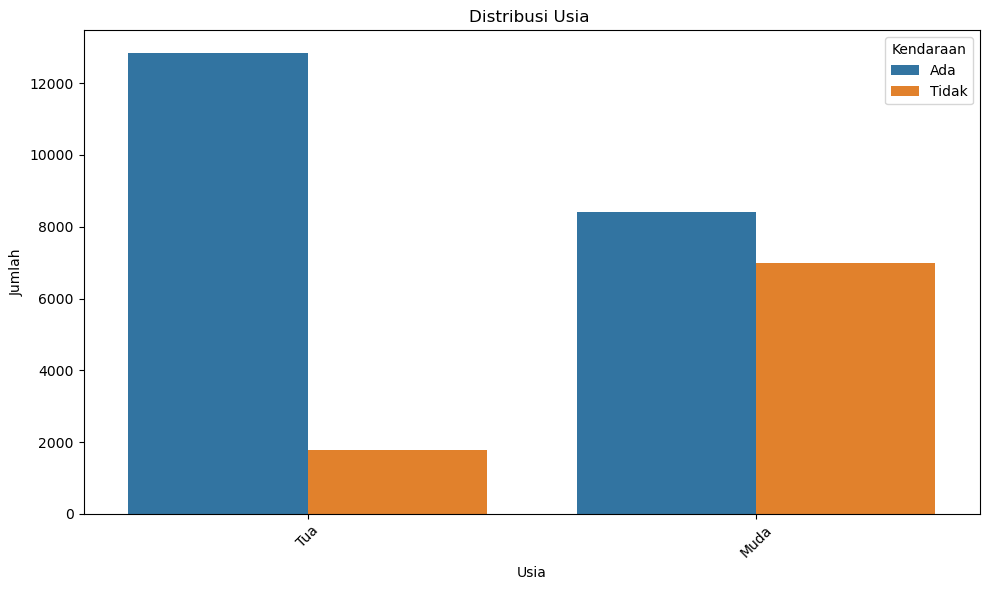

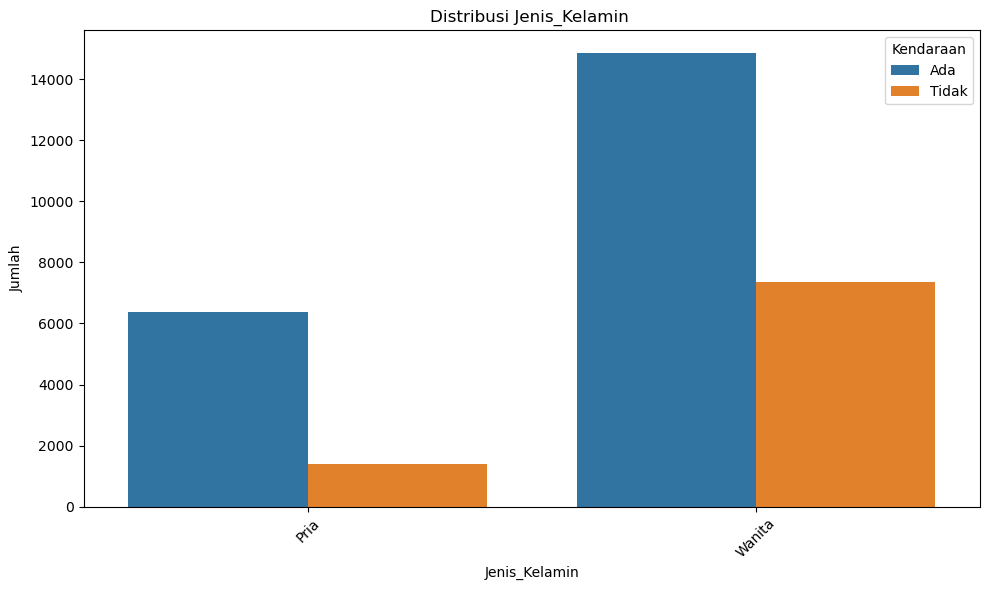

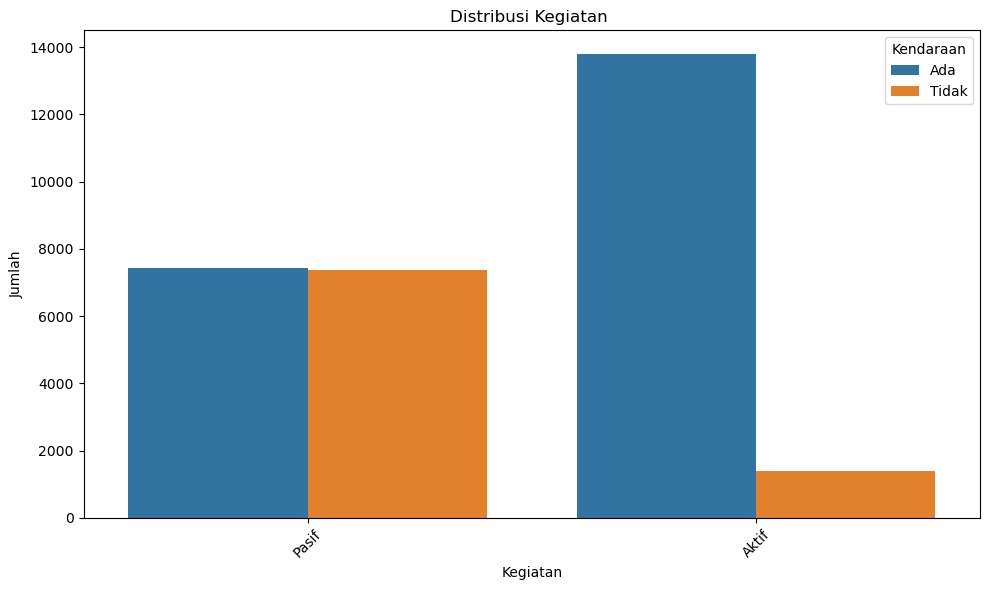

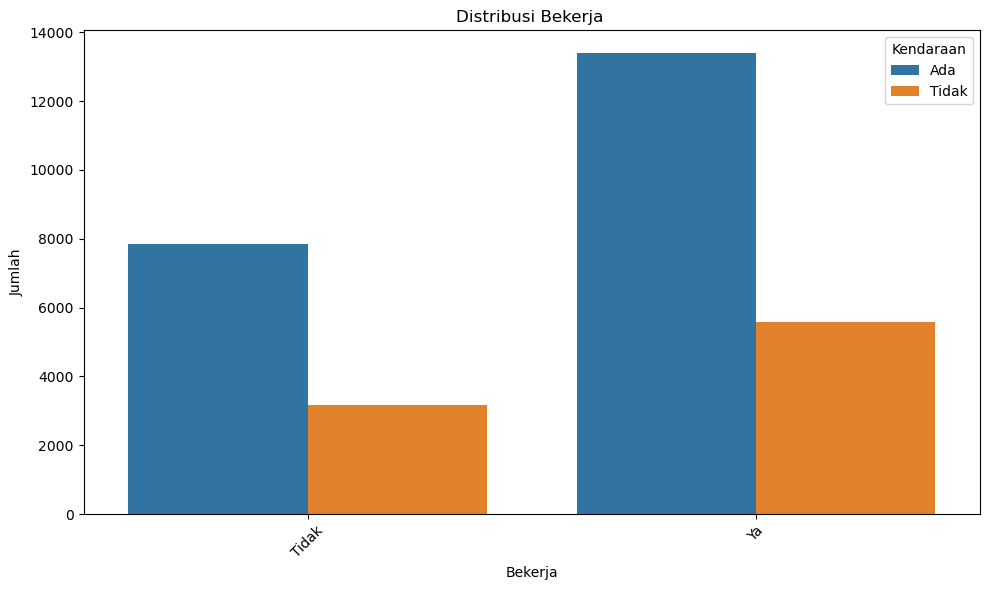

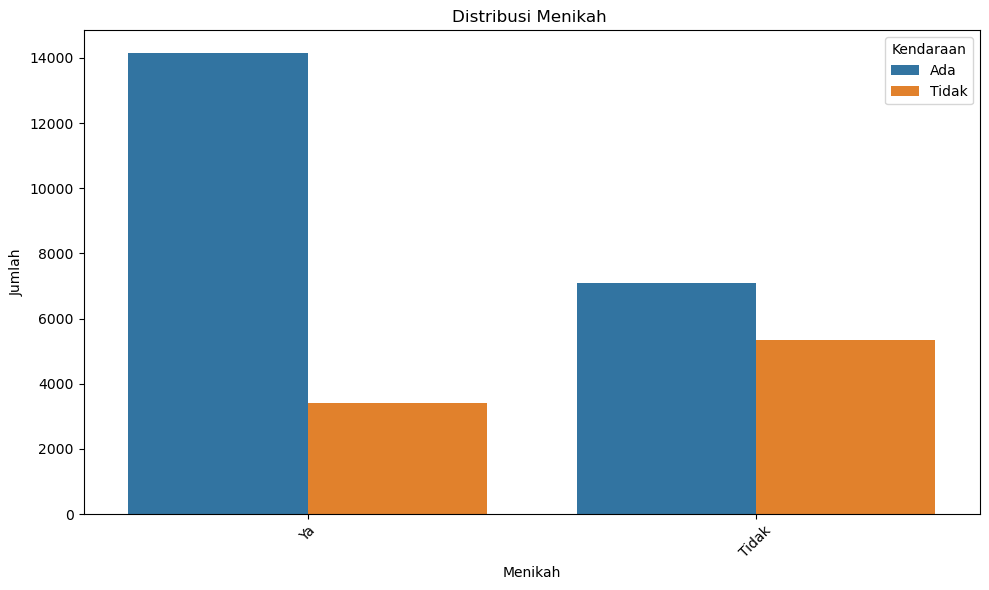

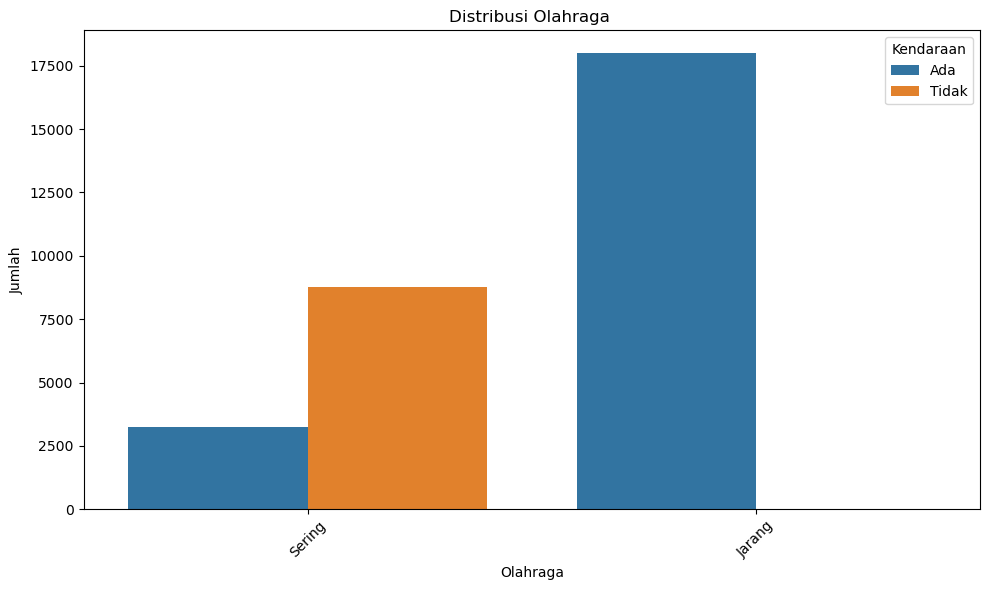

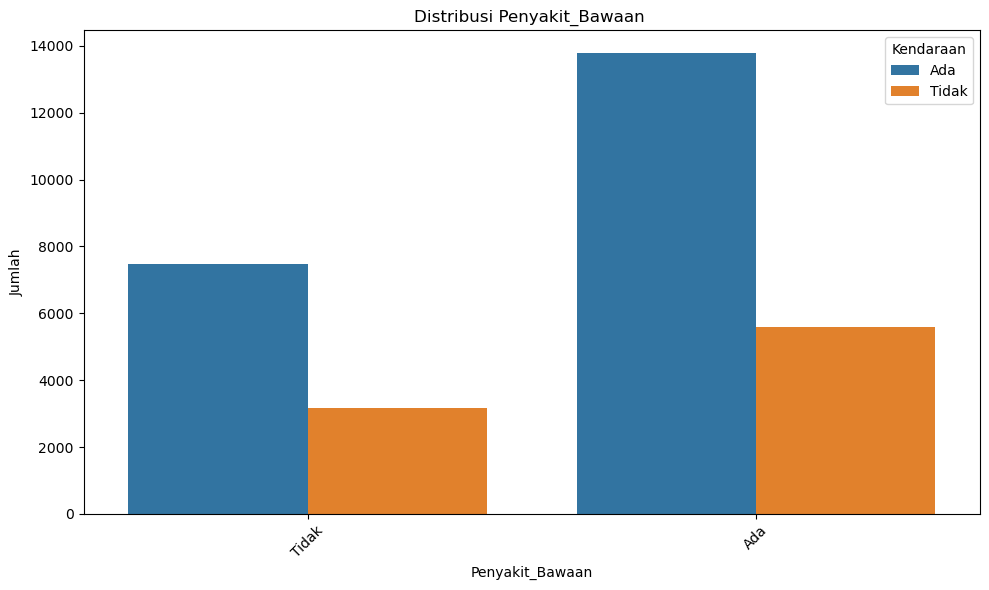

In [130]:
# Mendefinisikan fungsi untuk membuat bar chart yang membandingkan setiap kolom dengan status COVID-19
def plot_stacked_bar_chart(data, column):
    # Membuat figure baru dengan ukuran 10x6 inch
    plt.figure(figsize=(10, 6))
    
    # Membuat bar chart menggunakan seaborn countplot
    # x = kolom yang akan divisualisasikan
    # hue = memberikan warna berbeda berdasarkan status COVID-19
    # data = dataframe yang digunakan
    sns.countplot(x=column, hue='Kendaraan', data=data)
    
    # Menambahkan judul grafik
    plt.title(f'Distribusi {column} ')
    
    # Menambahkan label pada sumbu x dan y
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    
    # Memutar label sumbu x 45 derajat agar lebih mudah dibaca
    plt.xticks(rotation=45)
    
    # Menambahkan legend dengan judul 'COVID-19' di pojok kanan atas
    plt.legend(title='Kendaraan', loc='upper right')
    
    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Menampilkan plot
    plt.show()

# Melakukan iterasi untuk setiap kolom dalam dataframe
# Dan membuat bar chart untuk membandingkan dengan status COVID-19
# Kecuali untuk kolom 'COVID-19' itu sendiri
for column in df.columns:
    if column != 'Kendaraan':
        plot_stacked_bar_chart(df, column)

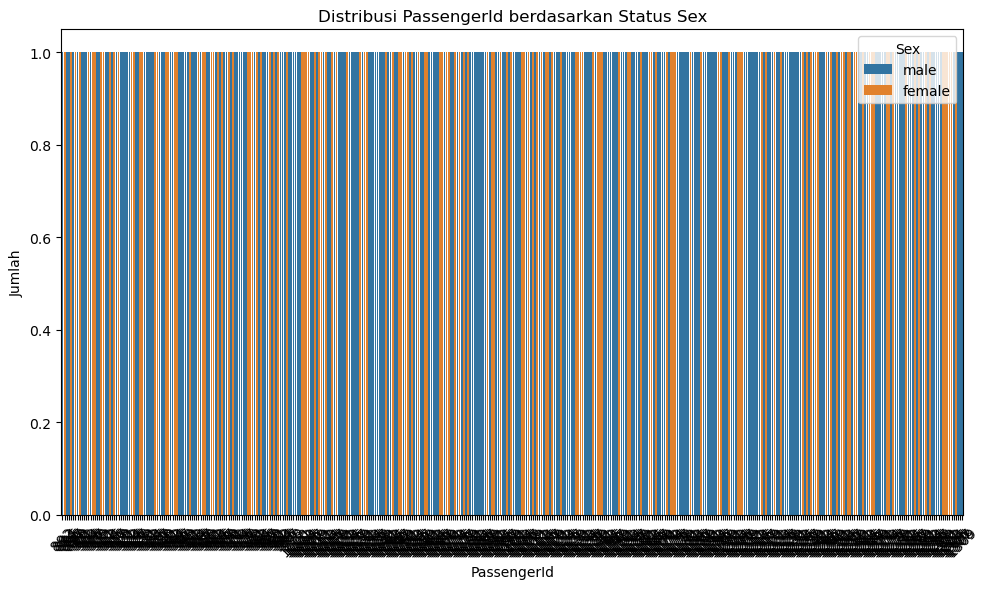

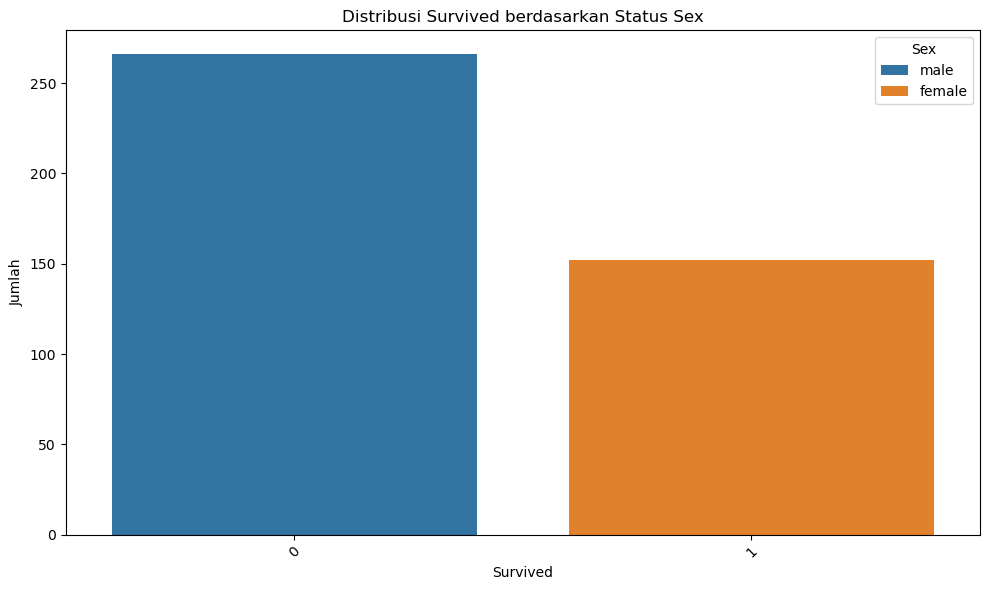

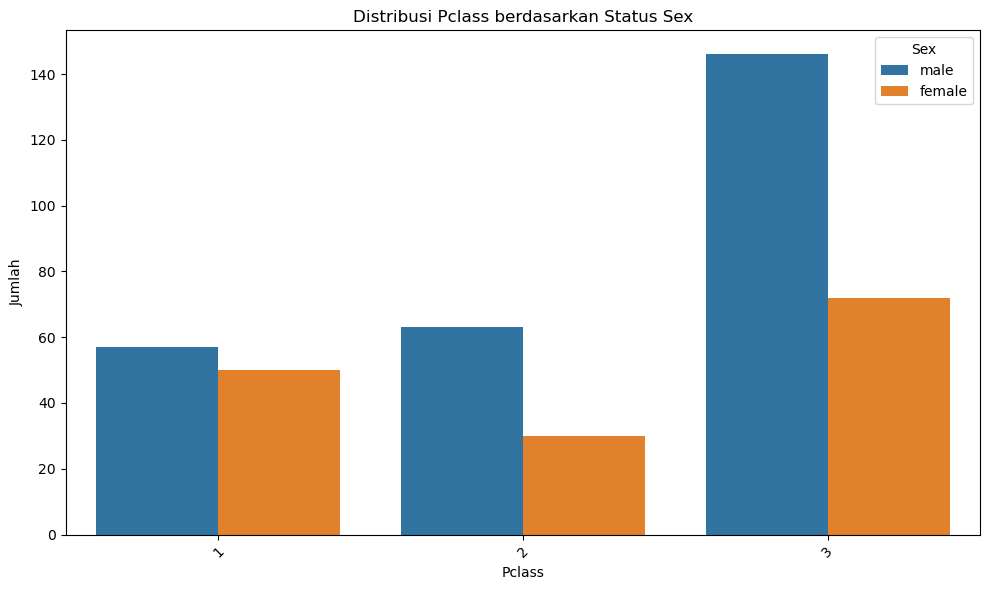

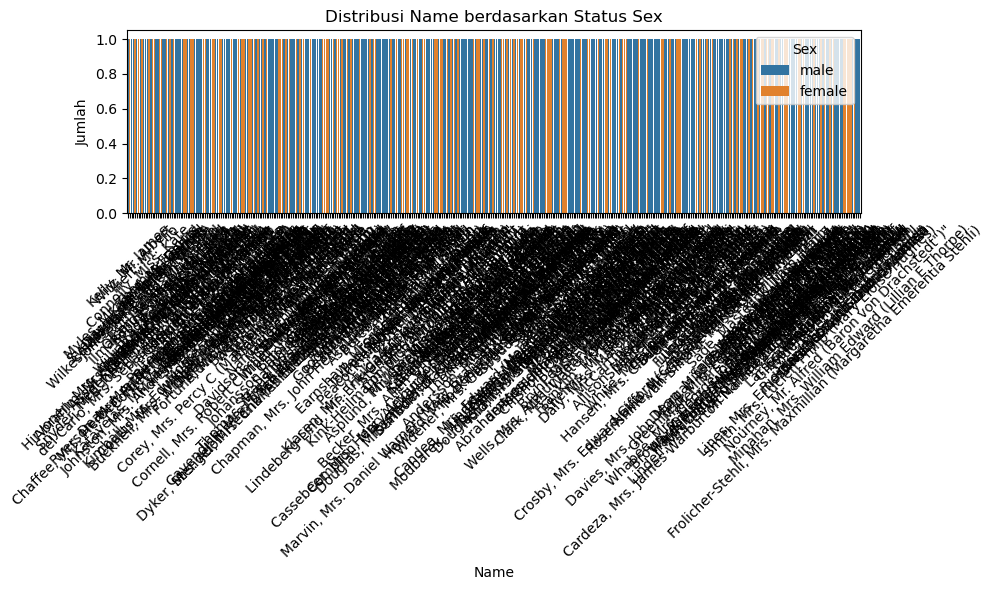

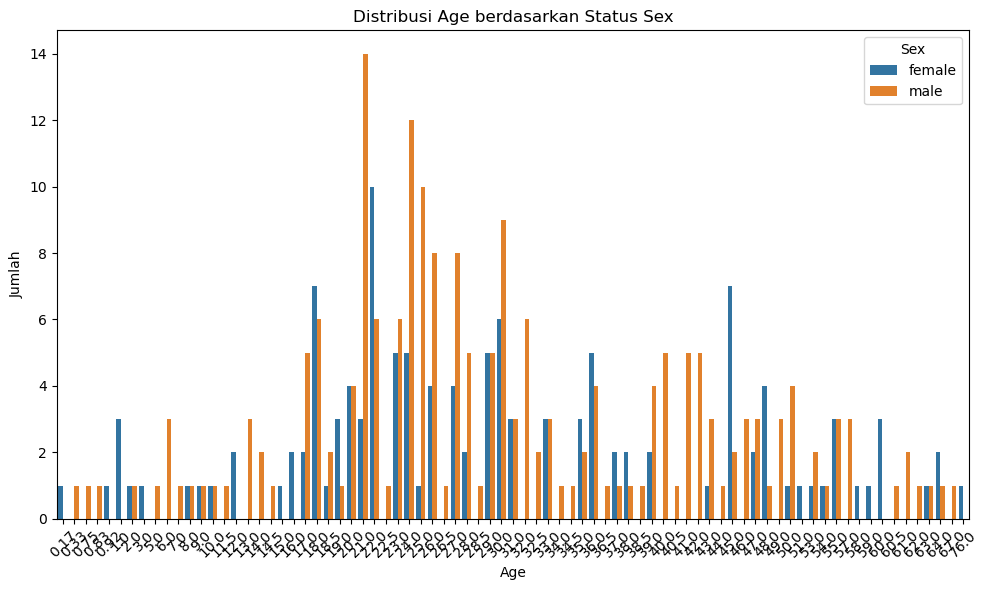

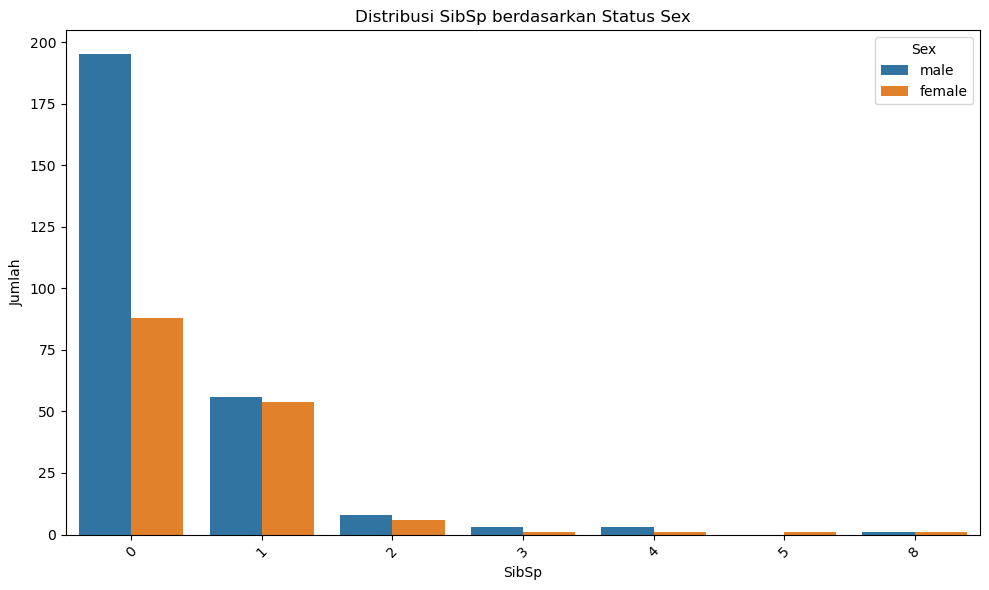

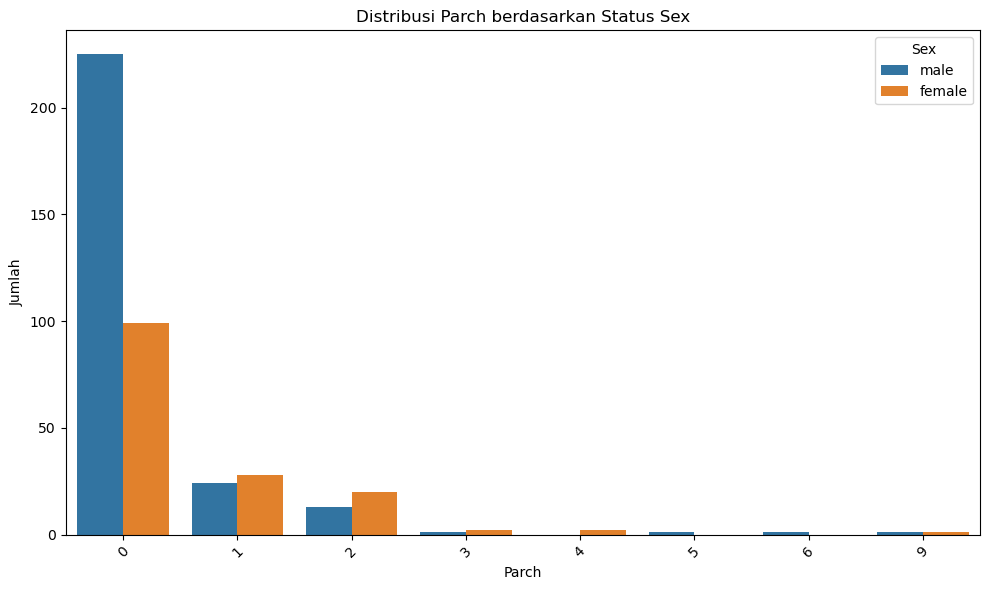

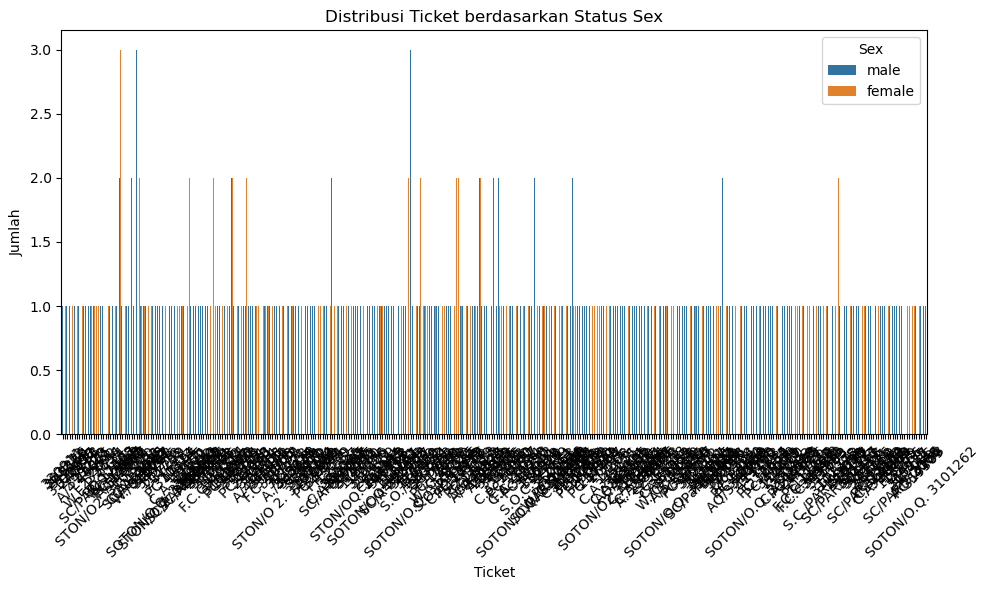

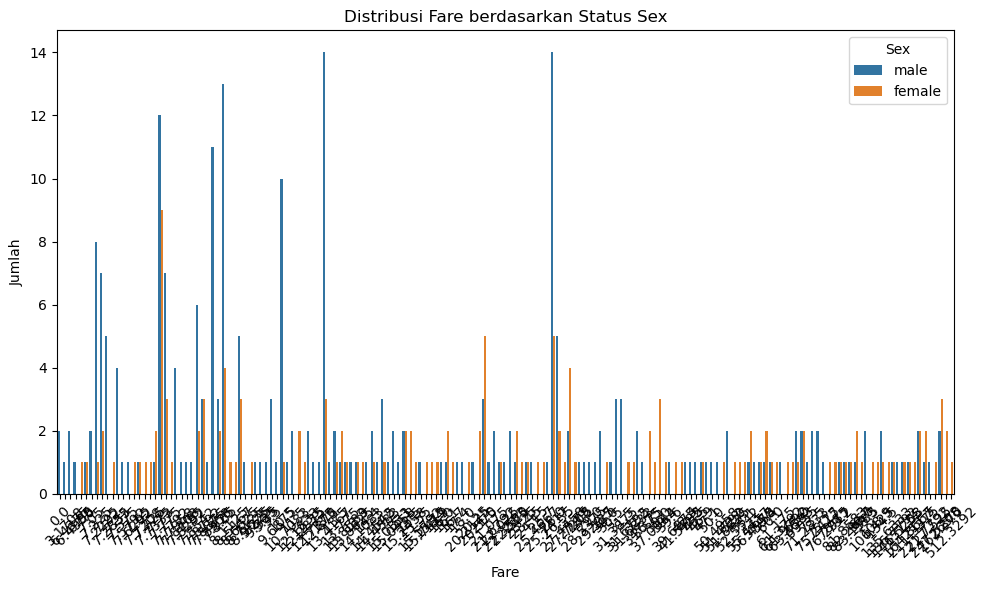

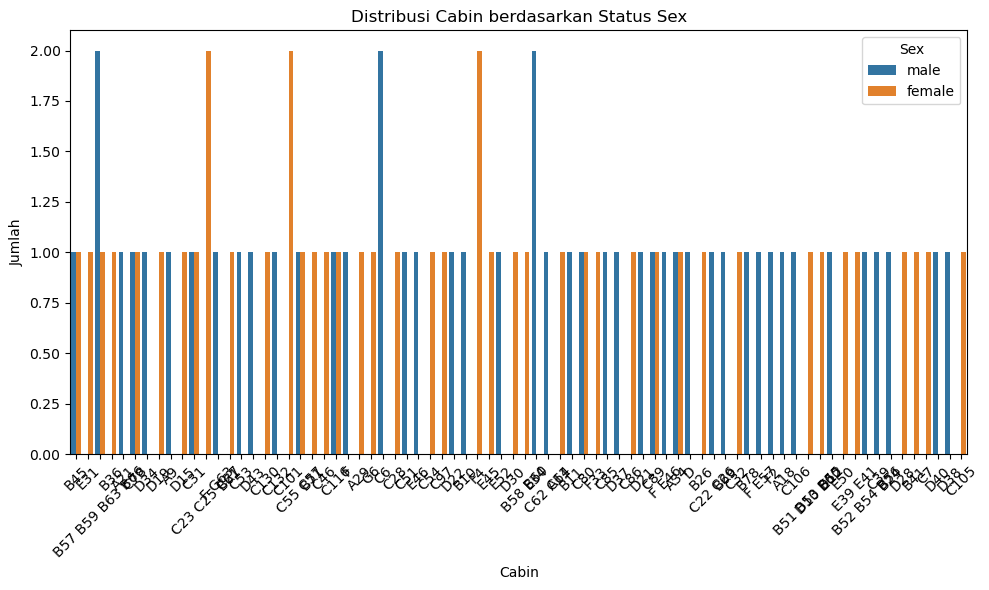

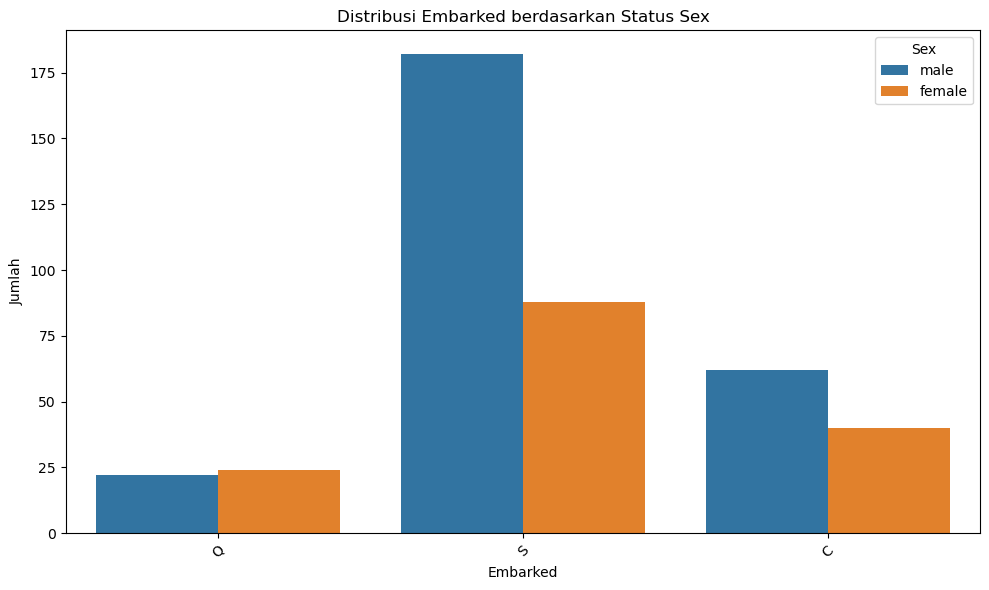

In [18]:
# Mendefinisikan fungsi untuk membuat bar chart yang membandingkan setiap kolom dengan status COVID-19
def plot_stacked_bar_chart(data, column):
    # Membuat figure baru dengan ukuran 10x6 inch
    plt.figure(figsize=(10, 6))
    
    # Membuat bar chart menggunakan seaborn countplot
    # x = kolom yang akan divisualisasikan
    # hue = memberikan warna berbeda berdasarkan status COVID-19
    # data = dataframe yang digunakan
    sns.countplot(x=column, hue='Kendaraan', data=data)
    
    # Menambahkan judul grafik
    plt.title(f'Distribusi {column} berdasarkan Status Kendaraan')
    
    # Menambahkan label pada sumbu x dan y
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    
    # Memutar label sumbu x 45 derajat agar lebih mudah dibaca
    plt.xticks(rotation=45)
    
    # Menambahkan legend dengan judul 'COVID-19' di pojok kanan atas
    plt.legend(title='Kendaraan', loc='upper right')
    
    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Menampilkan plot
    plt.show()

# Melakukan iterasi untuk setiap kolom dalam dataframe
# Dan membuat bar chart untuk membandingkan dengan status COVID-19
# Kecuali untuk kolom 'gender' itu sendiri
for column in df.columns:
    if column != 'Kendaraan':
        plot_stacked_bar_chart(df, column)

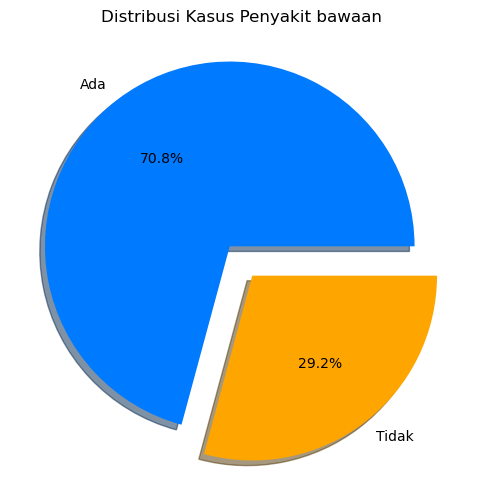

In [131]:
import matplotlib.pyplot as plt

# Hitung jumlah setiap kategori dalam kolom 'type'
type_counts = df['Kendaraan'].value_counts()

# Pastikan jumlah kategori lebih dari 0 sebelum membuat pie chart
if len(type_counts) > 0:
    # Sesuaikan panjang explode dengan jumlah kategori unik
    explode = [0.1] * len(type_counts)

    # Membuat figure dengan ukuran 8x6 inch
    plt.figure(figsize=(8, 6))

    # Membuat pie chart
    type_counts.plot(kind='pie', 
                     autopct='%1.1f%%', 
                     startangle=0, 
                     colors=['#007BFF', '#FFA500', '#28A745', '#DC3545', '#FFC107'],  # Warna tambahan
                     shadow=True, 
                     explode=explode)

    # Menambahkan judul grafik
    plt.title('Distribusi Kasus Penyakit bawaan')

    # Hapus label sumbu Y
    plt.ylabel('')

    # Menampilkan plot
    plt.show()
else:
    print("Data 'Penyakit bawaan' tidak tersedia untuk membuat pie chart.")


In [75]:
# Melakukan encoding pada variabel kategorikal (mengubah data teks menjadi numerik)
# Membuat objek LabelEncoder untuk melakukan proses encoding
label_encoder = LabelEncoder()

# Melakukan iterasi untuk setiap kolom yang bertipe object (string/teks) dalam dataframe
for column in df.select_dtypes(include=[object]).columns:
    # Mengubah nilai kategorikal menjadi numerik menggunakan fit_transform
    # fit_transform akan:
    # 1. Mempelajari kategori unik dalam kolom (fit)
    # 2. Mengubah setiap kategori menjadi angka (transform)
    # Contoh: 'Yes' -> 1, 'No' -> 0
    df[column] = label_encoder.fit_transform(df[column])


In [76]:
df

,No,Usia,Jenis_Kelamin,Kegiatan,Bekerja,Menikah,Olahraga,Penyakit_Bawaan,Kendaraan
0,1,1,0,1,0,1,1,1,0
1,2,1,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,1,0
3,4,1,0,0,1,0,0,0,0
4,5,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
29995,29996,0,0,0,0,1,0,1,0
29996,29997,1,1,0,1,1,0,0,0
29997,29998,1,1,0,1,1,0,0,0
29998,29999,0,1,1,1,0,1,0,1


In [141]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Olahraga'] = label_encoder.fit_transform(df['Olahraga'])


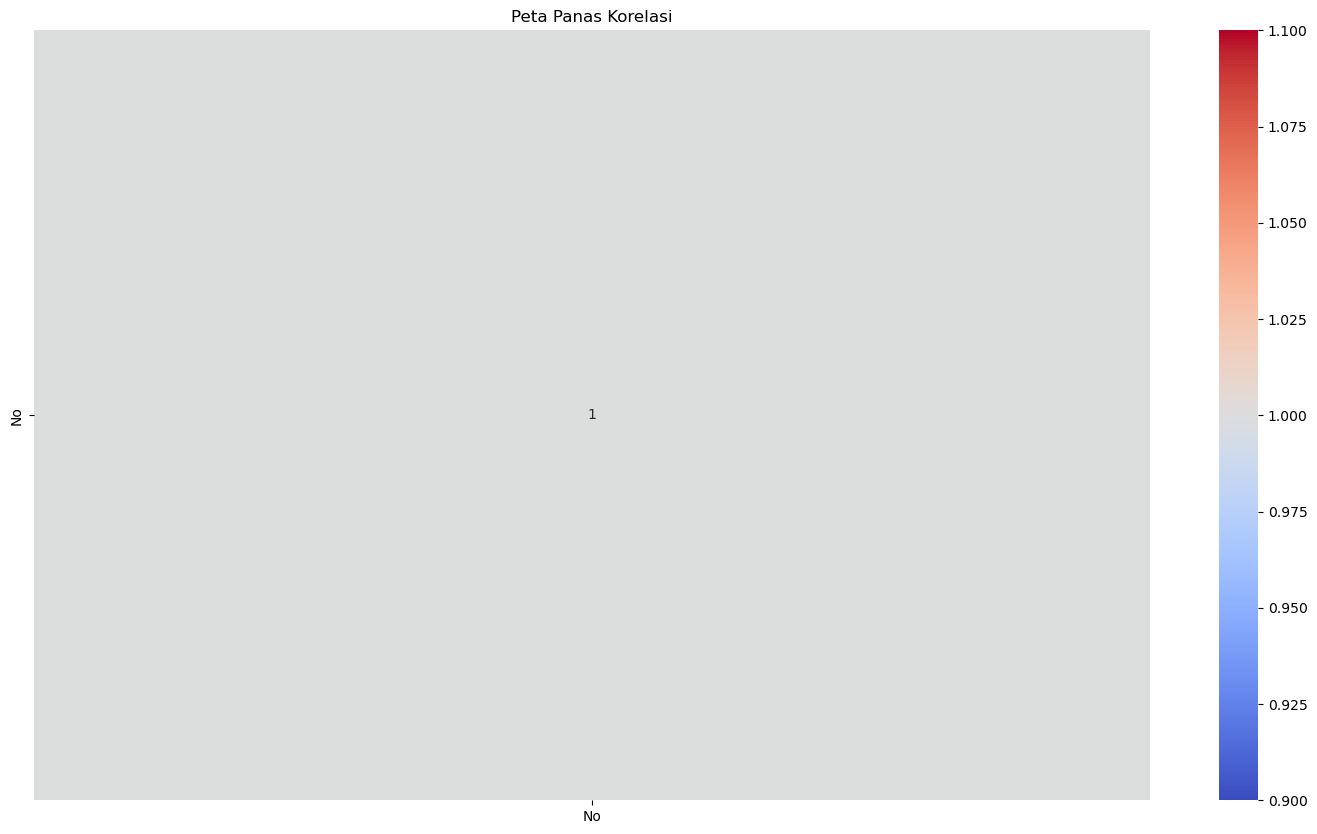

In [142]:
# Membuat visualisasi peta panas (heatmap) untuk melihat korelasi antar variabel numerik

# Memilih kolom-kolom yang bertipe numerik (integer dan float) dari dataframe
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns

# Membuat figure dengan ukuran 18x10 inci
plt.figure(figsize=(18, 10))

# Membuat peta panas menggunakan seaborn:
# - df[kolom_numerik].corr() menghitung korelasi antar kolom numerik
# - annot=True menampilkan nilai korelasi di setiap sel
# - cmap='coolwarm' mengatur skema warna (merah=korelasi positif, biru=korelasi negatif)
sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm')

# Menambahkan judul pada plot
plt.title('Peta Panas Korelasi')

# Menampilkan visualisasi
plt.show()

In [79]:
# Langkah 5: Memisahkan data menjadi fitur (X) dan target/label (y)

# Membuat variabel X yang berisi semua kolom kecuali kolom 'owner'
# df.drop(columns=['owner']) akan menghapus kolom 'owner' dari dataframe
# dan menyimpan hasilnya ke variabel X sebagai fitur untuk model
X = df.drop(columns=['Kendaraan'])

# Membuat variabel y yang hanya berisi kolom 'ownert' 
# df['weight'] akan mengambil kolom 'owner' saja
# dan menyimpannya ke variabel y sebagai target/label yang akan diprediksi
y = df['Menikah']

In [80]:
print(X.shape)
print(y.shape)
print(y.value_counts())  # Cek distribusi kelas sebelum SMOTE


(30000, 8)
(30000,)
Menikah
1    17548
0    12452
Name: count, dtype: int64


In [81]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)

In [82]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Distribusi kelas setelah SMOTE:", Counter(y_balanced))


Distribusi kelas setelah SMOTE: Counter({1: 17548, 0: 17548})


In [36]:
import pandas as pd

X = pd.DataFrame(X)  # Ensure X is a DataFrame
X = X.dropna()        # Remove rows with NaN values

# Make sure y has corresponding values after dropping NaN rows in X
y = y[X.index]


In [38]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X = imputer.fit_transform(X)


In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Distribusi kelas setelah SMOTE:", Counter(y_balanced))


Distribusi kelas setelah SMOTE: Counter({1: 204, 0: 204})


In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
X = imputer.fit_transform(X)


In [41]:
# Langkah 7: Membagi data menjadi data latih dan data uji
# train_test_split() adalah fungsi untuk membagi dataset menjadi data latih dan data uji
# Parameter yang digunakan:
# - X_balanced: fitur yang sudah diseimbangkan dengan SMOTE
# - y_balanced: target/label yang sudah diseimbangkan dengan SMOTE  
# - test_size=0.2: 20% data akan digunakan sebagai data uji, sisanya 80% untuk data latih
# - random_state=42: untuk memastikan hasil pembagian data yang konsisten setiap kali kode dijalankan
# - stratify=y_balanced: memastikan proporsi kelas pada data latih dan uji tetap seimbang
# Hasil pembagian disimpan ke dalam 4 variabel:
# - X_train: fitur untuk data latih (80% data)
# - X_test: fitur untuk data uji (20% data)
# - y_train: label untuk data latih (80% data)
# - y_test: label untuk data uji (20% data)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [42]:
# Menampilkan ringkasan dari pembagian data setelah SMOTE
# Mencetak dimensi/ukuran dari data latih fitur (X_train)
# shape akan menampilkan (jumlah baris, jumlah kolom)
print("Dimensi X_train:", X_train.shape)

# Mencetak dimensi/ukuran dari data latih label (y_train)
# shape akan menampilkan (jumlah baris,) karena y_train hanya 1 kolom
print("Dimensi y_train:", y_train.shape)

# Mencetak dimensi/ukuran dari data uji fitur (X_test)
# shape akan menampilkan (jumlah baris, jumlah kolom) 
print("Dimensi X_test:", X_test.shape)

# Mencetak dimensi/ukuran dari data uji label (y_test)
# shape akan menampilkan (jumlah baris,) karena y_test hanya 1 kolom
print("Dimensi y_test:", y_test.shape)

# Mencetak distribusi kelas pada data latih label (y_train)
# value_counts() akan menghitung jumlah data untuk setiap kelas
print("Distribusi kelas pada y_train:")
print(y_train.value_counts())

# Mencetak nama-nama fitur yang digunakan dalam model
# columns akan menampilkan daftar nama kolom dari X_train
print("Fitur yang digunakan:", X_train.columns)

Dimensi X_train: (326, 11)
Dimensi y_train: (326,)
Dimensi X_test: (82, 11)
Dimensi y_test: (82,)
Distribusi kelas pada y_train:
Sex
1    163
0    163
Name: count, dtype: int64


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [43]:
smote = SMOTE(random_state=42)

In [83]:
y = df['Bekerja'] 

# Modelling


In [84]:
# Membuat model Decision Tree untuk klasifikasi
# DecisionTreeClassifier adalah algoritma pembelajaran mesin yang membuat keputusan berdasarkan aturan if-else
# Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree menggunakan data latih (X_train dan y_train)
# fit() akan mempelajari pola dari data latih untuk membuat pohon keputusan
dt_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan menghasilkan prediksi kelas untuk setiap data dalam X_test
# Hasil prediksi disimpan dalam variabel y_pred_dt untuk evaluasi model
y_pred_dt = dt_model.predict(X_test)

In [47]:
# Membuat model Random Forest untuk klasifikasi
# Random Forest adalah algoritma ensemble yang menggunakan banyak pohon keputusan
# random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan
# n_estimators=100 menentukan jumlah pohon keputusan yang akan dibuat (100 pohon)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Melatih model Random Forest menggunakan data latih (X_train dan y_train)
# fit() akan mempelajari pola dari data latih dengan membuat 100 pohon keputusan yang berbeda
rf_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan menghasilkan prediksi kelas untuk setiap data dalam X_test
# Hasil prediksi disimpan dalam variabel y_pred_rf untuk evaluasi model
y_pred_rf = rf_model.predict(X_test)

In [85]:
# Membuat model Naive Bayes untuk klasifikasi
# GaussianNB() adalah algoritma Naive Bayes yang mengasumsikan fitur-fitur berdistribusi normal/Gaussian
# Naive Bayes bekerja berdasarkan teorema Bayes dengan asumsi bahwa setiap fitur independen satu sama lain
nb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data latih (X_train dan y_train)
# fit() akan mempelajari probabilitas setiap fitur untuk setiap kelas dari data latih
nb_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan menghasilkan prediksi kelas untuk setiap data dalam X_test berdasarkan probabilitas yang telah dipelajari
# Hasil prediksi disimpan dalam variabel y_pred_nb untuk evaluasi model
y_pred_nb = nb_model.predict(X_test)

In [86]:
# Membuat model Support Vector Machine (SVM) untuk klasifikasi
# SVM bekerja dengan mencari hyperplane terbaik yang memisahkan kelas-kelas data
# Parameter kernel='linear' menentukan jenis kernel yang digunakan (dalam hal ini kernel linear)
# random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model SVM menggunakan data latih (X_train dan y_train)
# fit() akan mencari hyperplane optimal yang memisahkan kelas-kelas dalam data latih
svm_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan mengklasifikasikan data uji berdasarkan hyperplane yang telah ditemukan
# Hasil prediksi disimpan dalam variabel y_pred_svm untuk evaluasi model
y_pred_svm = svm_model.predict(X_test)

In [87]:
# Membuat model K-Nearest Neighbors (KNN) untuk klasifikasi
# KNN bekerja dengan mencari k tetangga terdekat dari data yang akan diprediksi
# Parameter n_neighbors=5 menentukan jumlah tetangga terdekat yang akan dipertimbangkan (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN menggunakan data latih (X_train dan y_train)
# fit() akan menyimpan data latih sebagai referensi untuk prediksi
knn_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan mencari 5 tetangga terdekat untuk setiap data uji dan menentukan kelas berdasarkan mayoritas
# Hasil prediksi disimpan dalam variabel y_pred_knn untuk evaluasi model
y_pred_knn = knn_model.predict(X_test)

# Evaluation

In [88]:
# Mendefinisikan fungsi untuk membuat visualisasi confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Membuat confusion matrix dengan membandingkan nilai aktual (y_true) dan prediksi (y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    # Membuat figure baru dengan ukuran 8x6 inci
    plt.figure(figsize=(8, 6))
    
    # Membuat heatmap dari confusion matrix menggunakan seaborn
    # annot=True untuk menampilkan nilai di setiap sel
    # fmt='d' untuk format angka sebagai integer
    # cmap='Blues' untuk menggunakan skema warna biru
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    
    # Menambahkan judul plot dengan nama model
    plt.title(f'Confusion Matrix - {model_name}')
    
    # Menambahkan label untuk sumbu y (nilai aktual)
    plt.ylabel('Actual')
    
    # Menambahkan label untuk sumbu x (nilai prediksi) 
    plt.xlabel('Predicted')
    
    # Menampilkan plot
    plt.show()

In [89]:
# Mendefinisikan fungsi untuk membuat plot ROC (Receiver Operating Characteristic) curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    # Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR)
    # menggunakan fungsi roc_curve dari sklearn
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    
    # Menghitung area di bawah kurva ROC (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Membuat figure baru dengan ukuran 8x6 inci
    plt.figure(figsize=(8, 6))
    
    # Plot kurva ROC dengan warna oranye dan label yang menunjukkan nilai AUC
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    
    # Plot garis baseline (garis diagonal) sebagai pembanding
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Mengatur batas sumbu x dari 0 sampai 1
    plt.xlim([0.0, 1.0])
    
    # Mengatur batas sumbu y dari 0 sampai 1.05
    plt.ylim([0.0, 1.05])
    
    # Menambahkan label untuk sumbu x
    plt.xlabel('False Positive Rate')
    
    # Menambahkan label untuk sumbu y
    plt.ylabel('True Positive Rate')
    
    # Menambahkan judul plot dengan nama model
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    
    # Menambahkan legend di pojok kanan bawah
    plt.legend(loc="lower right")
    
    # Menampilkan plot
    plt.show()


In [90]:
# Membuat dictionary yang berisi model-model machine learning yang akan dievaluasi
# Dictionary ini memiliki:
# - Key: nama model (string) 
# - Value: objek model yang sudah dilatih sebelumnya

# models adalah dictionary yang berisi:
# - Decision Tree (dt_model): Model pohon keputusan untuk klasifikasi
# - Random Forest (rf_model): Model random forest yang menggunakan banyak pohon keputusan
# - Naive Bayes (nb_model): Model naive bayes untuk klasifikasi probabilistik
# - SVM (svm_model): Model Support Vector Machine untuk klasifikasi
# - KNN (knn_model): Model K-Nearest Neighbors untuk klasifikasi berdasarkan tetangga terdekat
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model, 
    'Naive Bayes': nb_model,
    'SVM': svm_model,
    'KNN': knn_model
}

In [91]:
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  # Set probability=True agar bisa pakai predict_proba
}



================= Model: Random Forest =================
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        41

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Confusion Matrix:
 [[41  0]
 [ 0 41]]


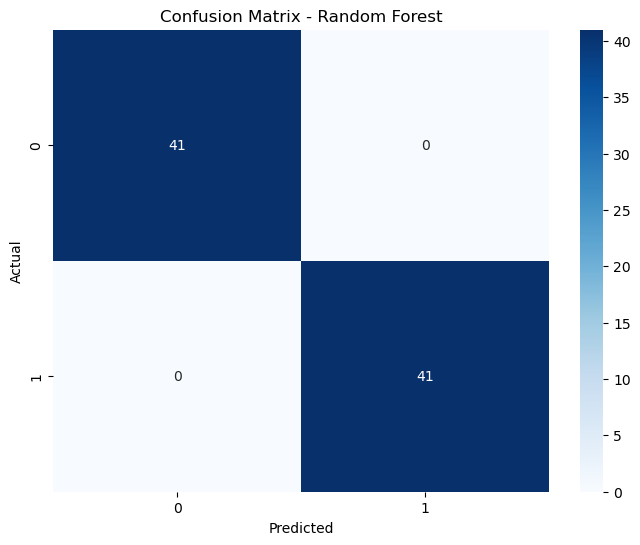

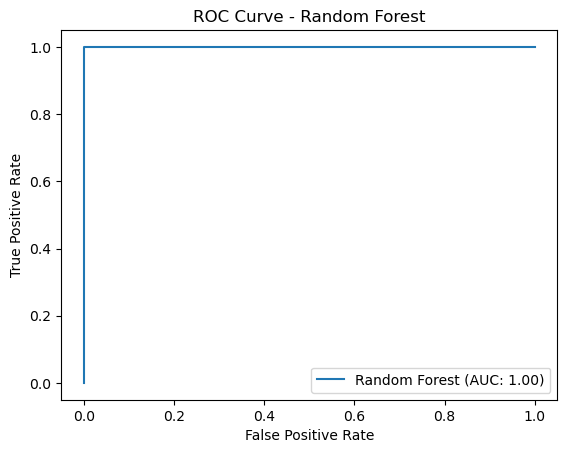


================= Model: SVM =================
Accuracy: 0.975609756097561
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.95      0.97        41

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82

Confusion Matrix:
 [[41  0]
 [ 2 39]]


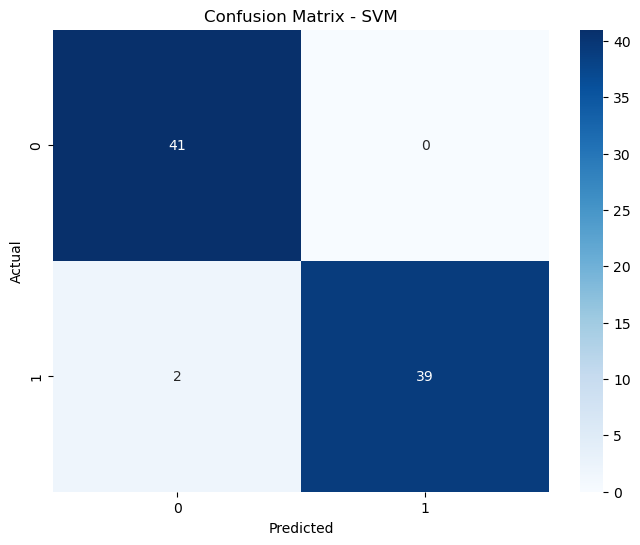

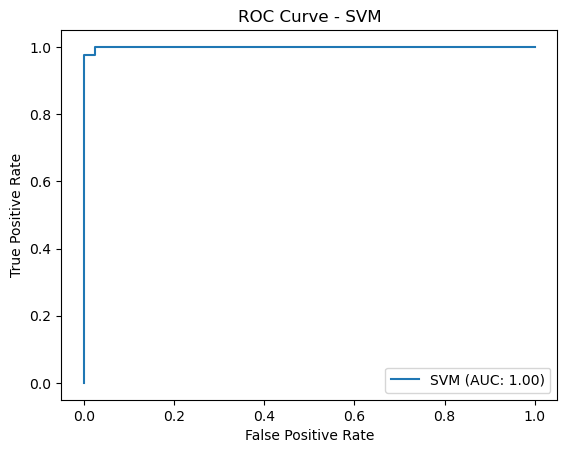

In [92]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# **Standardisasi Data (Penting untuk Logistic Regression & SVM)**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Iterasi untuk Setiap Model**
for model_name, model in models.items():
    print(f"\n================= Model: {model_name} =================")
    
    # **Mengatasi Logistic Regression yang gagal konvergen**
    if model_name == "Logistic Regression":
        model.set_params(max_iter=1000, solver="saga")

    # **Melatih Model**
    model.fit(X_train_scaled, y_train)
    
    # **Melakukan Prediksi**
    y_pred = model.predict(X_test_scaled)

    # **Evaluasi Model**
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # **Visualisasi Confusion Matrix**
    plot_confusion_matrix(y_test, y_pred, model_name)

    # **Mengecek apakah model mendukung prediksi probabilitas**
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_scaled)
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test_scaled)
    else:
        print(f"⚠️ Model {model_name} tidak mendukung probabilitas. ROC Curve dilewati.")
        continue

    # **Mengatasi ROC Curve untuk Multiclass**
    unique_classes = np.unique(y_test)
    if len(unique_classes) > 2:
        print("🔍 Multiclass Detected: Menggunakan One-vs-Rest (OvR) untuk ROC Curve")
        
        # **Binarisasi Label untuk ROC Multiclass**
        y_test_bin = label_binarize(y_test, classes=unique_classes)
        
        # **One-vs-Rest (OvR) ROC Curve**
        for i in range(len(unique_classes)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f'Class {unique_classes[i]} (AUC: {auc(fpr, tpr):.2f})')
    else:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC: {auc(fpr, tpr):.2f})")

    # **Menampilkan ROC Curve**
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()


In [93]:
# Evaluasi model Decision Tree
# Menghitung akurasi dengan membandingkan nilai prediksi dengan nilai sebenarnya
accuracy_dt = accuracy_score(y_test, y_pred_dt)
# Membuat laporan klasifikasi yang berisi precision, recall, f1-score untuk setiap kelas
classification_report_dt = classification_report(y_test, y_pred_dt)
# Membuat confusion matrix untuk melihat true positive, false positive, true negative, false negative
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Menampilkan hasil evaluasi Decision Tree
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)

# Evaluasi model Random Forest
# Menghitung akurasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Membuat laporan klasifikasi Random Forest
classification_report_rf = classification_report(y_test, y_pred_rf)
# Membuat confusion matrix Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi Random Forest
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)

# Evaluasi model Naive Bayes
# Menghitung akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
# Membuat laporan klasifikasi Naive Bayes
classification_report_nb = classification_report(y_test, y_pred_nb)
# Membuat confusion matrix Naive Bayes
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Menampilkan hasil evaluasi Naive Bayes
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", classification_report_nb)
print("Naive Bayes Confusion Matrix:\n", confusion_matrix_nb)

# Evaluasi model SVM (Support Vector Machine)
# Menghitung akurasi SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Membuat laporan klasifikasi SVM
classification_report_svm = classification_report(y_test, y_pred_svm)
# Membuat confusion matrix SVM
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan hasil evaluasi SVM
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report_svm)
print("SVM Confusion Matrix:\n", confusion_matrix_svm)

# Evaluasi model KNN (K-Nearest Neighbors)
# Menghitung akurasi KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
# Membuat laporan klasifikasi KNN
classification_report_knn = classification_report(y_test, y_pred_knn)
# Membuat confusion matrix KNN
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan hasil evaluasi KNN
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", classification_report_knn)
print("KNN Confusion Matrix:\n", confusion_matrix_knn)


Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        41

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Decision Tree Confusion Matrix:
 [[41  0]
 [ 0 41]]
Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        41

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Random Forest Confusion Matrix:
 [[41  0]
 [ 0 41]]
Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   su

In [94]:
# Membuat dictionary untuk menyimpan hasil evaluasi dari semua model
# Dictionary ini akan memudahkan dalam membandingkan performa antar model
model_performance = {
    # Menyimpan hasil evaluasi model Decision Tree
    'Decision Tree': {
        'Accuracy': accuracy_dt,                       # Nilai akurasi
        'Classification Report': classification_report_dt,  # Laporan klasifikasi detail
        'Confusion Matrix': confusion_matrix_dt        # Matrix konfusi
    },
    # Menyimpan hasil evaluasi model Random Forest 
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Classification Report': classification_report_rf,
        'Confusion Matrix': confusion_matrix_rf
    },
    # Menyimpan hasil evaluasi model Naive Bayes
    'Naive Bayes': {
        'Accuracy': accuracy_nb,
        'Classification Report': classification_report_nb,
        'Confusion Matrix': confusion_matrix_nb
    },
    # Menyimpan hasil evaluasi model SVM
    'SVM': {
        'Accuracy': accuracy_svm,
        'Classification Report': classification_report_svm,
        'Confusion Matrix': confusion_matrix_svm
    },
    # Menyimpan hasil evaluasi model KNN
    'KNN': {
        'Accuracy': accuracy_knn,
        'Classification Report': classification_report_knn,
        'Confusion Matrix': confusion_matrix_knn
    }
}

# Menampilkan hasil evaluasi untuk setiap model
# Loop melalui setiap model dalam dictionary
for model_name, performance in model_performance.items():
    print(f"\nModel: {model_name}")                                    # Nama model
    print(f"Accuracy: {performance['Accuracy']}")                      # Nilai akurasi model
    print("Classification Report:\n", performance['Classification Report'])  # Laporan klasifikasi detail
    print("Confusion Matrix:\n", performance['Confusion Matrix'])           # Matrix konfusi


Model: Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        41

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Confusion Matrix:
 [[41  0]
 [ 0 41]]

Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        41

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Confusion Matrix:
 [[41  0]
 [ 0 41]]

Model: Naive Bayes
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00    

In [95]:
# Membuat dictionary untuk menyimpan hasil evaluasi dari semua model
# Dictionary ini akan memudahkan dalam membandingkan performa antar model
model_performance = {
    # Menyimpan hasil evaluasi model Decision Tree
    'Decision Tree': {
        'Accuracy': accuracy_dt,                       # Nilai akurasi
        'Classification Report': classification_report_dt,  # Laporan klasifikasi detail
        'Confusion Matrix': confusion_matrix_dt        # Matrix konfusi
    },
    # Menyimpan hasil evaluasi model Random Forest 
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Classification Report': classification_report_rf,
        'Confusion Matrix': confusion_matrix_rf
    },
    # Menyimpan hasil evaluasi model Naive Bayes
    'Naive Bayes': {
        'Accuracy': accuracy_nb,
        'Classification Report': classification_report_nb,
        'Confusion Matrix': confusion_matrix_nb
    },
    # Menyimpan hasil evaluasi model SVM
    'SVM': {
        'Accuracy': accuracy_svm,
        'Classification Report': classification_report_svm,
        'Confusion Matrix': confusion_matrix_svm
    },
    # Menyimpan hasil evaluasi model KNN
    'KNN': {
        'Accuracy': accuracy_knn,
        'Classification Report': classification_report_knn,
        'Confusion Matrix': confusion_matrix_knn
    }
}

# Menampilkan hasil evaluasi untuk setiap model
# Loop melalui setiap model dalam dictionary
for model_name, performance in model_performance.items():
    print(f"\nModel: {model_name}")                                    # Nama model
    print(f"Accuracy: {performance['Accuracy']}")                      # Nilai akurasi model
    print("Classification Report:\n", performance['Classification Report'])  # Laporan klasifikasi detail
    print("Confusion Matrix:\n", performance['Confusion Matrix'])           # Matrix konfusi


Model: Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        41

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Confusion Matrix:
 [[41  0]
 [ 0 41]]

Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        41

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Confusion Matrix:
 [[41  0]
 [ 0 41]]

Model: Naive Bayes
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00    

# Deployment

In [96]:
# Import library joblib untuk menyimpan dan memuat model machine learning
import joblib

# Menyimpan model-model yang telah dilatih ke dalam file .pkl
# joblib.dump() digunakan untuk menyimpan model ke dalam file
# Parameter pertama adalah model yang akan disimpan
# Parameter kedua adalah nama file untuk menyimpan model

# Menyimpan model Decision Tree ke file decision_tree_model.pkl
joblib.dump(dt_model, 'decision_tree_model.pkl')

# Menyimpan model Random Forest ke file random_forest_model.pkl 
joblib.dump(rf_model, 'random_forest_model.pkl')

# Menyimpan model Naive Bayes ke file naive_bayes_model.pkl
joblib.dump(nb_model, 'naive_bayes_model.pkl')

# Menyimpan model Support Vector Machine ke file svm_model.pkl
joblib.dump(svm_model, 'svm_model.pkl')

# Menyimpan model K-Nearest Neighbors ke file knn_model.pkl
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [97]:
# Memuat kembali model-model yang telah disimpan sebelumnya menggunakan joblib.load()

# Memuat model Decision Tree dari file decision_tree_model.pkl
# Model ini akan digunakan untuk melakukan prediksi klasifikasi COVID-19
loaded_dt_model = joblib.load('decision_tree_model.pkl')

# Memuat model Random Forest dari file random_forest_model.pkl
# Model ini menggunakan kumpulan decision tree untuk prediksi yang lebih akurat
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Memuat model Naive Bayes dari file naive_bayes_model.pkl
# Model probabilistik yang menggunakan teorema Bayes untuk klasifikasi
loaded_nb_model = joblib.load('naive_bayes_model.pkl')

# Memuat model Support Vector Machine dari file svm_model.pkl
# Model yang mencari hyperplane terbaik untuk memisahkan kelas-kelas
loaded_svm_model = joblib.load('svm_model.pkl')

# Memuat model K-Nearest Neighbors dari file knn_model.pkl
# Model yang melakukan klasifikasi berdasarkan tetangga terdekat
loaded_knn_model = joblib.load('knn_model.pkl')

In [99]:
new_data = X_test[0].reshape(1, -1)  # Mengubah menjadi bentuk 2D

In [100]:
import pandas as pd

# Pastikan kolom tetap sesuai dengan aslinya
new_data = pd.DataFrame([X_test[0]], columns=feature_names)  # Sesuaikan feature_names dengan nama fitur yang digunakan

NameError: name 'feature_names' is not defined

In [101]:
prediction_dt = loaded_dt_model.predict(new_data)

In [104]:
# Membuat data baru untuk pengujian prediksi
# Mengambil baris pertama dari data test (X_test) sebagai contoh data
# to_frame().T digunakan untuk mengubah series menjadi dataframe dan melakukan transpose
new_data = X_test.iloc[0].to_frame().T

# Melakukan prediksi menggunakan model-model yang telah dimuat sebelumnya
# Setiap model akan memberikan prediksi berdasarkan data baru yang diberikan
prediction_dt = loaded_dt_model.predict(new_data)    # Prediksi menggunakan Decision Tree
prediction_rf = loaded_rf_model.predict(new_data)    # Prediksi menggunakan Random Forest  
prediction_nb = loaded_nb_model.predict(new_data)    # Prediksi menggunakan Naive Bayes
prediction_svm = loaded_svm_model.predict(new_data)  # Prediksi menggunakan Support Vector Machine
prediction_knn = loaded_knn_model.predict(new_data)  # Prediksi menggunakan K-Nearest Neighbors

# Menampilkan hasil prediksi dari setiap model
# Jika hasil prediksi = 1 maka "Positif", jika tidak maka "Negatif"
# Menggunakan f-string dan ternary operator untuk format output
print(f"Decision Tree Prediction: {'Positif' if prediction_dt[0] == 1 else 'Negatif'}")   # Hasil prediksi Decision Tree
print(f"Random Forest Prediction: {'Positif' if prediction_rf[0] == 1 else 'Negatif'}")   # Hasil prediksi Random Forest
print(f"Naive Bayes Prediction: {'Positif' if prediction_nb[0] == 1 else 'Negatif'}")     # Hasil prediksi Naive Bayes
print(f"SVM Prediction: {'Positif' if prediction_svm[0] == 1 else 'Negatif'}")            # Hasil prediksi SVM
print(f"KNN Prediction: {'Positif' if prediction_knn[0] == 1 else 'Negatif'}")            # Hasil prediksi KNN

ValueError: 4 columns passed, passed data had 11 columns